# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса о недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цель исследования

1. Определить рыночную стоимость объектов недвижимости
2. Выявить, какие факторы влияют на стоимость объекта недвижимости

## Ход исследования

Данные для исследования экспортирует из файла csv.
О качестве данных информации нет, поэтому как приступать к исследованию проведем обзор данных.

Также  необходимо будет проверить данные на наличие ошибок и их влияние на исследование. Далее на этапе предобработки рассмотрим возможность исправления ошибок и заполнения пропусков, которые не приведут к искажению результатов исследования.
После создадим дополнительные признаки, которые помогут в исследовании. И приступим непосредственно к исследованию.

Таким образом, в ходе проекта выполним следующие **этапы**:
* Обзор данных
* Предобработка данных
* Расчеты и добавление результатов в таблицу
* Проведение анализа 
* Выявление зависимости стоимости квартир от различных факторов
* Выявление зависимости стоимости квартир в Санкт-Петербурге от близости к центру города
* Оформление выводов по результатам исследования

## Описание данных
 
 * `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
 * `balcony` — число балконов
 * `ceiling_height` — высота потолков (м)
 *	`cityCenters_nearest` — расстояние до центра города (м)
 *	`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
 *	`first_day_exposition` — дата публикации
 *	`floor` — этаж
 *	`floors_total` — всего этажей в доме
 *	`is_apartment` — апартаменты (булев тип)
 *	`kitchen_area` — площадь кухни в квадратных метрах (м²)
 *	`last_price` — цена на момент снятия с публикации
 *	`living_area` — жилая площадь в квадратных метрах (м²)
 *	`locality_name` — название населённого пункта
 *	`open_plan` — свободная планировка (булев тип)
 *	`parks_around3000` — число парков в радиусе 3 км
 *	`parks_nearest` — расстояние до ближайшего парка (м)
 *	`ponds_around3000` — число водоёмов в радиусе 3 км
 *	`ponds_nearest` — расстояние до ближайшего водоёма (м)
 *	`rooms` — число комнат
 *	`studio` — квартира-студия (булев тип)
 *	`total_area` — общая площадь квартиры в квадратных метрах (м²)
 *	`total_images` — число фотографий квартиры в объявлении


### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
#сохраним исходный размер данных
old_shape = data.shape
old_shape

(23699, 22)

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


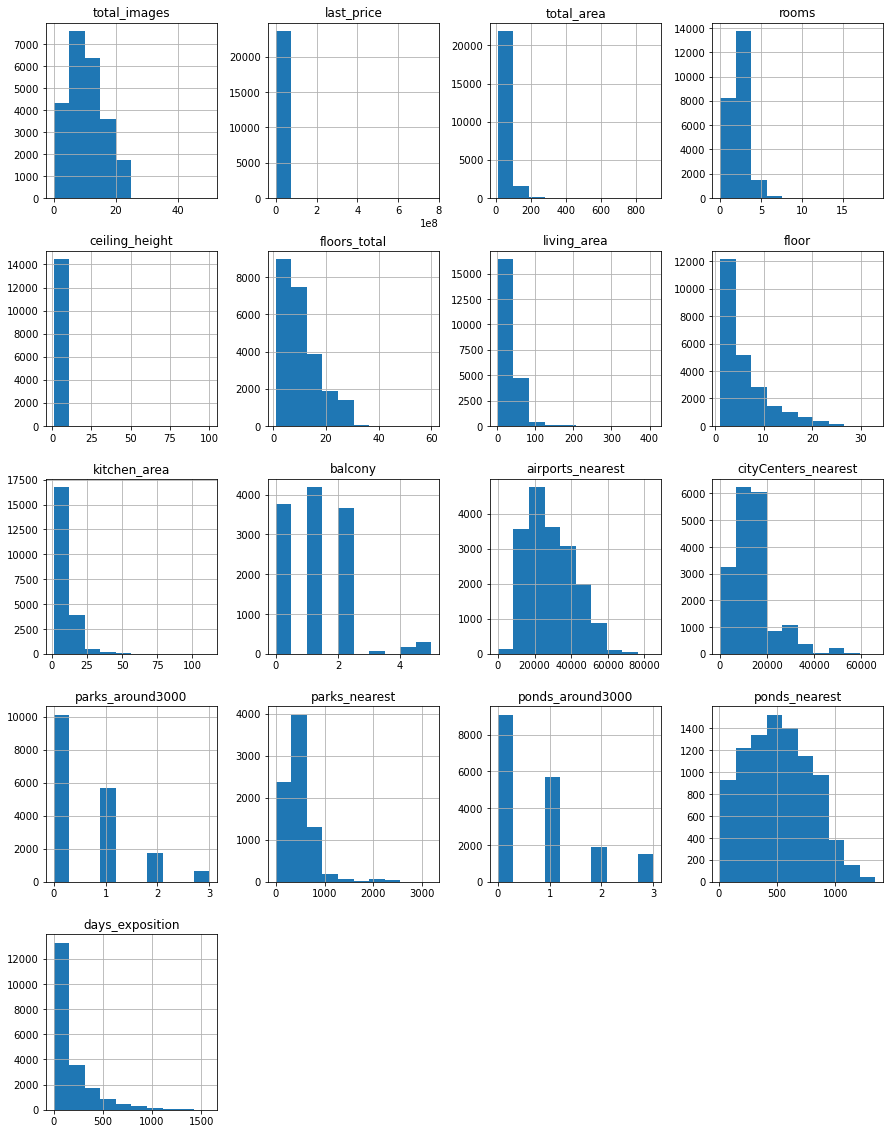

In [9]:
data.hist(figsize=(15, 20));

### Выводы: 
Для изучения представлены данные по объектам недвижимости, описываемые 22 признаками и содержащие 23 699 записей.

Первичный анализ показывает, что 
*  в данных имеются пропуски: так к примеру признак ceiling_height заполнен на 61%;
*  название одного из столбцов содержит верхний регистр.

Распределение числовых признаков показывает, что имеются выбросы:

   *  так как разброс высоты потолка составляет от 1 до 100 м
   *  максимальная цена объекта 76300000 при медианном значении 4650000
   *  максимальная площадь составляет 900 м²
   *  количество комнат от 0 до 19 шт

### Предобработка данных

In [10]:
#переименуем столбецы cityCenters_nearest, parks_around3000, ponds_around3000 для лучшего восприятия информации
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'park_around_3km', 
                            'ponds_around3000': 'ponds_around_3km'})

In [11]:
#Проверим данные на наличие полных дубликатов, в случае обнаружения - удалим их.
data.duplicated().sum()

0

**Поиск пропущенных значений**

In [12]:
#найдем процент пропущенных значений
#data.isna().mean()*100

In [13]:
#найдем процент пропущенных значений
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Начнем с признака `is_apartament`. Рассмотрим возможные причины возникновения пропусков

In [14]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [15]:
print('Количество пропусков признака:', data['is_apartment'].isna().sum())
print('Заполненные значения признака:', '\n', data['is_apartment'].value_counts())

Количество пропусков признака: 20924
Заполненные значения признака: 
 False    2725
True       50
Name: is_apartment, dtype: int64


  Логично предположить, что незаполненные признаки, возникали по причине того, что
  * объекты размещения являются квартирами и люди, размещающие объявления, не были в теме различий между этими типами объектов, и как следствие признак не заполняли. 
  * второй причиной возможно является, не такая распространенность во временном промежутке (с ноября 2014 по май 2019) такого типа недвижимости. 

  В таком варианте, допустимо заполнить пропуски 0, а не False, чтобы след о произведенных заполнениях также остался.

In [16]:
# заполняем пропущенные значения 0 и проверим результат.
data['is_apartment'] = data['is_apartment'].fillna(0)
print('После заполнения нулями осталось', data['is_apartment'].isna().sum(), 'пропущенных значений')

После заполнения нулями осталось 0 пропущенных значений


Признак `balcony` на 48% состоит из пропусков. 
Логичнее всего предположить, что пропуск возникает в том случае, когда балкона нет. Заполним признак также 0.

In [17]:
data['balcony'] = data['balcony'].fillna(0)
print('После заполнения нулями осталось', data['balcony'].isna().sum(), 'пропущенных значений')

После заполнения нулями осталось 0 пропущенных значений


Пропусков в признаке `locality_name` менее 1% (0.206760%). Поэтому без ухудшения качества данных можно удалить строки с пропусками в этом столбце.

In [18]:
data = data.dropna(subset=['locality_name'])
print('После ', data['locality_name'].isna().sum(), 'пропущенных значений')

После  0 пропущенных значений


Заполним пропуски в данных по общей этажности здания `floors_total` исходя из соображения, что здание не может быть ниже этажа, на котором расположен объект недвижимости.

In [19]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']
# проверим наличие пропусков после обработки
print('После заполнения осталось', data['floors_total'].isna().sum(), 'пропущенных значений')    

После заполнения осталось 0 пропущенных значений


Пропуски в `days_exposition` на текущем этапе оставим без заполнения. 

При заполнении медианой, сократится среднее время продажи, но оставит неизменным медиану.

При заполнении средним значением, в большую сторону сильно сдвигается медиана.

Оба варинта не совсем подходят для использования, так как пропуски в данном столбце могли возникнуть по следующим причинам:
   * просто не заполнена информация по факту продажи
   * объявление снято, без продажи объекта.

Если возникнут мысли по результатам анализа данных, мы сможем сделать это позже.   


Признак`kitchen_area` может принимать значение NaN, если:
   * квартира имеет свободную планировку (`open_plan`=True)
   * объект является апартаментами (`is_apartment`=True)
   * квартира является студией (изолированным помещением является только санузел)

In [20]:
def add_mean_isna(data, column):
    ''' Заполнение пропусков исходя из средних значений'''
    
    mean = data[column].mean()
    data.loc[data[column].isna() , column] = round(mean, 1)
    
    return data

In [21]:
def add_median_isna(data, column):
    ''' Заполнение пропусков исходя из медианных значений'''
    
    median = data[column].median()
    data.loc[data[column].isna() , column] = round(median, 1)
    
    return data

In [22]:
data = data.groupby('rooms').apply(add_median_isna, 'kitchen_area')

In [23]:
# проверим наличие пропусков после обработки
print('После заполнения осталось', data['kitchen_area'].isna().sum(), 'пропущенных значений')    

После заполнения осталось 197 пропущенных значений


Пропуски в признаке `living_area` заполним следующим образом:
   * вычислим разность между общей площадью и кухней
   * найдем долю жилой площади в найденой разности
   * вычислим медианное значение этой доли
   
Заполнять пропуски будем используя группировку по категории размера объекта. 

Для этого введем категорийный признак размера объекта недвижимости:
  * до 25 кв.м - V
  * свыше 25 до 50 - IV
  * свыше 50 до 80 - III
  * свыше 80 до 100 - II
  * свыше 100 - I 

In [24]:
def area_categorize(data):
    ''' категоризация общей площади объекта недвижимости'''
    if data['total_area'] < 25:
        return 'V'
    elif data['total_area'] <= 50:
        return 'IV'
    elif data['total_area'] <= 80:
        return 'III'
    elif data['total_area'] <= 100:
        return 'II'
    return 'I'

In [25]:
data['area_category'] = data.apply(area_categorize, axis=1)
data[['total_area', 'area_category']].head()

,total_area,area_category
0,108.0,I
1,40.4,IV
2,56.0,III
3,159.0,I
4,100.0,II


In [26]:
print('Количество пропусков признака \"living_area\":', data['living_area'].isna().sum())

Количество пропусков признака "living_area": 1898


In [27]:
def add_median_perc_isna(data):
    ''' Заполнение пропусков 'living_area' исходя из медианных значений доли 
    этой площади в квартирах с одинаковым количеством комнат'''
    
    median_perc = (data['living_area'] / (data['total_area'] - data['kitchen_area'])).median()
    data.loc[data['living_area'].isna(), 'living_area'] = round(median_perc * (data['total_area'] - data['kitchen_area']), 1)

    return data

In [28]:
data = data.groupby('area_category').apply(add_median_perc_isna)
print('Количество пропусков признака \"living_area\":', data['living_area'].isna().sum())

Количество пропусков признака "living_area": 14


Признак `living_area` может принимать значение NaN, если:
   * квартира имеет свободную планировку (`open_plan`=True)
   * объект является апартаментами (`is_apartment`=True)
   * квартира является студией (изолированным помещением является только санузел)

Признак `ceiling_height` как вариант можно заполнить медианным значением по категории объектов.

In [29]:
data = data.groupby('area_category').apply(add_median_isna, 'ceiling_height')
# проверим наличие пропусков после обработки
print('После заполнения осталось', data['ceiling_height'].isna().sum(), 'пропущенных значений')  

После заполнения осталось 0 пропущенных значений


Проверим, какие данные остались не заполненными:

In [30]:
#найдем процент пропущенных значений
#data.isna().mean()*100
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


Необработанными остались картографические признаки:
* `airports_nearest`        
* `city_centers_nearest`    
* `park_around_3km`         
* `parks_nearest`           
* `ponds_around_3km`        
* `ponds_nearest`           

Пропуски скорее всего возникли, из-за отсуствия данных по территориальному размещению объекта в базе данных, либо возник какой-то технический сбой, так как процент пропусков идентичен у групп показателей.

На текущий момент считаю возможным, оставить данные в таком виде. Когда будет проведен анализ признака локации, по имеющимся данным можно будет провести заполнение этих признаков.

In [31]:
#проверим объем данных сохранившийся
new_shape = data.shape
(1 - new_shape[0]/old_shape[0]) * 100 

0.20675977889362818

Таким образом, на текущий момент менее 1% данных было удалено.

**Проведем изменение типов данных** и обработку некоторых столбцов.

Преобразуем `first_day_exposition` в формат datetime.

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Укрупним единицы измерения в следующих признаках:
* `last_price`- приведем к тыс.руб.
* `airports_nearest`, `city_centers_nearest` - приведем в км.

In [33]:
list_to_1000 = ['last_price','airports_nearest', 'city_centers_nearest']
#'parks_nearest', 'ponds_nearest'

In [34]:
for item in list_to_1000:
    data[item] = data[item] / 1000

Устраним неявные дубликаты в `locality_name` и данные занесем в новый столбец `locality_name_new`

In [35]:
print('Наименований населенных пунктов до обработки', data['locality_name'].nunique())

Наименований населенных пунктов до обработки 364


In [36]:
#проведем замену ё на е, приведем все названия к нижнему регистру
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].str.lower()

In [37]:
print('Наименований населенных пунктов после обработки', data['locality_name'].nunique())

Наименований населенных пунктов после обработки 330


In [38]:
replace_dict = {
    'поселок городского типа': 'поселок',
    'городской поселок': 'поселок',
    'коттеджный поселок': 'поселок',
    'поселок при железнодорожной станции': 'поселок',
    'поселок при станции': 'поселок'
}

In [39]:
def apply_replace_dict(text):
    try:
        for key, value in replace_dict.items():
            text = text.replace(key, value)
        return text
    except:
        return 'ошибка'

In [40]:
data['locality_name_new'] = data['locality_name'].apply(apply_replace_dict)

In [41]:
print('Наименований населенных пунктов после обработки', data['locality_name_new'].nunique())

Наименований населенных пунктов после обработки 321


В `locality_name` сократили число неявных дубликатов, количество населенных пунктов с 364 сократили до 321. Обновленные данные записали в новый столбец `locality_name_new`

После устранения неявных дубликатов в названиях населенных пунктов `locality_name`, возможно заполнить картографические пропуски на основании названии населенного пункта и среднего значения.


In [42]:
#Список картографических признаков, которые будем пытаться заполнить на основании имеющихся данных
list_change = ['airports_nearest', 'park_around_3km', 'parks_nearest', 'ponds_around_3km', 'ponds_nearest', 'city_centers_nearest']

In [43]:
#пройдемся циклом по вышеуказанным признакам
for item in list_change:
    print('До заполнения было', data[item].isna().sum(), 'пропущенных значений', item)
    data = data.groupby('locality_name_new').apply(add_median_isna, item)
    # проверим наличие пропусков после обработки
    print('После заполнения осталось', data[item].isna().sum(), 'пропущенных значений')   

До заполнения было 5534 пропущенных значений airports_nearest
После заполнения осталось 4864 пропущенных значений
До заполнения было 5510 пропущенных значений park_around_3km
После заполнения осталось 4864 пропущенных значений
До заполнения было 15586 пропущенных значений parks_nearest
После заполнения осталось 5998 пропущенных значений
До заполнения было 5510 пропущенных значений ponds_around_3km
После заполнения осталось 4864 пропущенных значений
До заполнения было 14565 пропущенных значений ponds_nearest
После заполнения осталось 4972 пропущенных значений
До заполнения было 5511 пропущенных значений city_centers_nearest
После заполнения осталось 4864 пропущенных значений


По доступным данным получилось заполнить не так много пропусков. По многим населенным пунктам нет картографической информации вообще. Заполним оставшиеся пропуски значением '-1'.

In [44]:
#Список картографических признаков, которые будем заполним '-1'
list_fillna = ['airports_nearest', 'parks_nearest', 'ponds_nearest', 'city_centers_nearest', 'park_around_3km',
               'ponds_around_3km', 'days_exposition']

In [45]:
#пройдемся циклом по вышеуказанным признакам
for item in list_fillna:
    print('До заполнения было', data[item].isna().sum(), 'пропущенных значений', item)
    data[item] = data[item].fillna(-1)
    # проверим наличие пропусков после обработки
    print('После заполнения осталось', data[item].isna().sum(), 'пропущенных значений')   

До заполнения было 4864 пропущенных значений airports_nearest
После заполнения осталось 0 пропущенных значений
До заполнения было 5998 пропущенных значений parks_nearest
После заполнения осталось 0 пропущенных значений
До заполнения было 4972 пропущенных значений ponds_nearest
После заполнения осталось 0 пропущенных значений
До заполнения было 4864 пропущенных значений city_centers_nearest
После заполнения осталось 0 пропущенных значений
До заполнения было 4864 пропущенных значений park_around_3km
После заполнения осталось 0 пропущенных значений
До заполнения было 4864 пропущенных значений ponds_around_3km
После заполнения осталось 0 пропущенных значений
До заполнения было 3180 пропущенных значений days_exposition
После заполнения осталось 0 пропущенных значений


Преобразуем вещественные признаки в целочисленные значения:
* `last_price`
* `floors_total`
* `balcony` 
* `days_exposition`
* и картографические признаки

In [46]:
list_to_int = ['floors_total', 'last_price', 'balcony', 'airports_nearest', 'city_centers_nearest', 'park_around_3km',
               'parks_nearest', 'ponds_around_3km', 'ponds_nearest', 'days_exposition']

In [47]:
for item in list_to_int:
    data[item] = data[item].astype('int')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23636 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23453 non-null  float64       
 13  balcony         

Проверим наши данные еще раз на предмет описательной статистики и разброса данных, наличие артефактов

In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23650.0,9.862326,5.682278,0.0,6.0,9.0,14.00,50.0
last_price,23650.0,6541.111036,10896.394247,12.0,3400.0,4650.0,6799.00,763000.0
total_area,23650.0,60.329069,35.661808,12.0,40.0,52.0,69.70,900.0
rooms,23650.0,2.070106,1.078620,0.0,1.0,2.0,3.00,19.0
ceiling_height,23650.0,2.720928,0.991768,1.0,2.6,2.6,2.75,100.0
floors_total,23650.0,10.673784,6.593455,1.0,5.0,9.0,16.00,60.0
living_area,23636.0,34.644070,22.723688,2.0,18.9,30.0,42.30,409.7
floor,23650.0,5.893277,4.883317,1.0,2.0,4.0,8.00,33.0
kitchen_area,23453.0,10.460319,5.661690,1.3,7.3,9.0,11.50,112.0
balcony,23650.0,0.591712,0.959662,0.0,0.0,0.0,1.00,5.0


**Проанализируем признаки:**
 * `total_images` принимает значения от 0 до 50, что вполне логично, объявление может размещаться и без фотографий и с подробнейшим фотоотчетом
 * `last_price` минимальная цена 12 и максимальная 763000. Явно имеются выбросы, необходимо избавиться от аномальных значений. Рассмотрим признак ниже.
 * `total_area` площади объектов от 12 кв.м. до 900 кв.м. - данный признак также требует очистки от аномалий.
 * `rooms` в данных до 19 шт, явно какой-то дворец был выставлен...
 * `ceiling_height` с высотой от метра до 100. Надо рассмотреть признак подробнее.
 * `floors_total` от 1 до 60 этажей. К минимальному значению претензий нет, а вот 60 этажей для Санкт-Петербурга и окрестностей, немного подозрительно. Надо проверить этот выброс.
 * `living_area` - от 2 от 409 кв.м., надо посмотреть распределение признака подробнее, так как 2 кв.м. жилой площади не входит в разумные пределы: если жилая площадь, то она не должна быть менее 9 кв.м., а вот если это объект нежилой, то она должны быть - 0.
 * `floor` - этажность квартиры находится в реальном диапазоне существующих зданий Санкт-Петербурга
 * `kitchen_area` - рассмотрим подборнее минимальные значения
 * `balcony` - с балконами все на превый взгляд логично
 * `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` - выглядят логично.
 * `park_around_3km`, `parks_nearest`, `ponds_around_3km`, `ponds_nearest` - количественные признаки, не сильно по логике вещей, влияющие на стоимость недвижимости

Начнем изучение аномалий с главного признака `last_price`

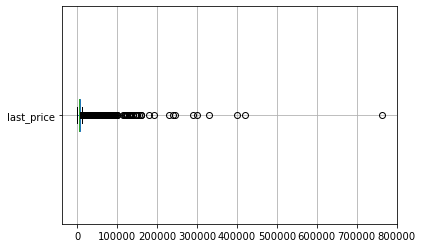

In [50]:
#посмотрим разброс значений стоимости объектов с помощью boxplot
data.boxplot(column=['last_price'], figsize=(6,4), vert=False);

Судя по ящику с усами объекты дороже 100000, можно откинуть сразу из рассмотрения

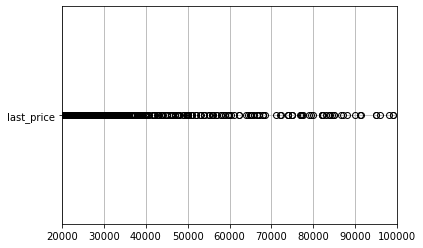

In [51]:
#построим boxplot для объектов дороже 20000
data.boxplot(column=['last_price'], figsize=(6,4), vert=False)
plt.xlim(20000,100000);

Проверим количество записей об объектах дороже 30000

In [52]:
data.query('last_price > 30000')['total_area'].describe()

count    316.000000
mean     213.828513
std      112.077989
min       55.300000
25%      140.750000
50%      180.000000
75%      251.750000
max      900.000000
Name: total_area, dtype: float64

Как показывает анализ, объектов дороже 30 000 было в базе данных 316 шт., при этом все эти квартиры можно отнести к категории больших и эксклюзивных квартир (минимальная площадь 55.3 кв.м, а максимальная 900 кв.м.)

Данные объекты оказывают значительное влияние на статистические показатели, при этом являются "штучным товаром". По этой причине, удалим данные об объектах стоимостью выше 30 000 из анализа. 

Объект со стоимостью реализации 12 тыс, явно является аномальным.
Возможно в данном объекте закралась ошибка в указании цены - цена была изначально указана в тысячах.
Проверим данное предположение по объектам со схожими характеристиками

In [53]:
data.query('last_price == 12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,park_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,area_category,locality_name_new
8793,7,12,109.0,2019-03-20,2,2.75,25,32.0,25,0,False,False,40.5,0,санкт-петербург,36,9,1,805,0,503,8,I,санкт-петербург


In [54]:
data[(data['total_area'] > 105) & (data['total_area'] < 110) \
       & (data['locality_name_new'] == 'cанкт-петербург') & (data['floors_total'] > 20)].sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,park_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,area_category,locality_name_new


In [55]:
data.query(('locality_name_new == "санкт-петербург" and total_area > 107 and total_area < 110 and floors_total > 23')).sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,park_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,area_category,locality_name_new
12263,20,16990,107.6,2019-04-18,3,3.00,24,46.3,17,0,False,False,29.5,0,санкт-петербург,34,14,0,460,1,564,-1,I,санкт-петербург
11302,12,14900,108.0,2018-02-20,3,3.00,24,67.8,10,0,False,False,9.5,0,санкт-петербург,33,14,0,460,0,503,328,I,санкт-петербург
13161,18,14500,108.0,2017-07-28,3,2.80,27,42.0,8,0,False,False,34.3,0,санкт-петербург,51,15,0,460,1,571,435,I,санкт-петербург
13674,1,7160,108.0,2016-01-23,4,3.00,25,61.2,9,False,False,False,13.3,0,санкт-петербург,42,9,0,460,0,503,285,I,санкт-петербург
17988,8,8400,108.0,2017-05-17,3,3.00,26,53.2,13,0,False,False,14.2,1,санкт-петербург,40,9,1,1248,0,503,119,I,санкт-петербург
20201,20,16300,108.0,2017-04-05,3,2.80,24,65.0,12,0,False,False,12.0,2,санкт-петербург,40,12,3,447,0,503,-1,I,санкт-петербург
22005,7,13900,108.0,2016-04-22,3,3.00,25,57.0,18,0,False,False,18.0,2,санкт-петербург,50,14,0,460,0,503,105,I,санкт-петербург
16346,7,13000,108.4,2015-06-16,3,2.85,25,90.0,15,0,False,False,10.2,1,санкт-петербург,51,14,0,460,0,503,865,I,санкт-петербург
1580,14,15990,108.7,2016-06-14,3,2.76,25,61.0,11,0,False,False,9.5,0,санкт-петербург,10,12,0,460,0,503,900,I,санкт-петербург
8793,7,12,109.0,2019-03-20,2,2.75,25,32.0,25,0,False,False,40.5,0,санкт-петербург,36,9,1,805,0,503,8,I,санкт-петербург


Предположение оказалось верным, изменим цену данного объекта, учитывая, что при внесении данных их уже указали в тыс.руб.

In [56]:
data.loc[8793, 'last_price'] = 12190

In [57]:
data = data.query('last_price <= 30000')

In [58]:
#Посмотрим какие объекты были реализованы дешевле чем за 1000
data.query('last_price < 1000').pivot_table(index='locality_name_new', values=['last_price', 'total_area'], aggfunc=['count', 'median']).reset_index()

locality_name_new      count                median           
                     last_price total_area last_price total_area
0       бокситогорск         14         14      735.0      44.00
1             волхов          3          3      900.0      29.00
2         всеволожск          1          1      965.0      22.50
3             выборг          4          4      820.0      30.33
4            гатчина          1          1      850.0      78.00
..               ...        ...        ...        ...        ...
68        светогорск          1          1      780.0      30.00
69         село паша          1          1      950.0      33.20
70            сланцы         83         83      740.0      42.00
71         сясьстрой          1          1      900.0      42.80
72            тихвин          1          1      770.0      18.00

[73 rows x 5 columns]

In [59]:
data.query('last_price < 1000').describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,224.0,8.169643,4.871236,0.0,5.00,7.0,11.000,20.0
last_price,224.0,771.553571,155.050366,430.0,650.00,790.0,900.000,999.0
total_area,224.0,41.532857,11.056699,18.0,32.00,41.0,47.125,88.0
rooms,224.0,1.678571,0.711397,0.0,1.00,2.0,2.000,4.0
ceiling_height,224.0,2.603750,0.180590,2.5,2.58,2.6,2.600,5.0
floors_total,224.0,4.013393,1.627896,1.0,2.00,5.0,5.000,9.0
living_area,224.0,24.863705,8.632775,12.5,17.30,23.6,30.450,57.4
floor,224.0,2.629464,1.604709,1.0,1.00,2.0,4.000,9.0
kitchen_area,223.0,7.388789,1.649218,3.0,6.00,7.2,8.800,15.3
balcony,224.0,0.294643,0.578205,0.0,0.00,0.0,0.000,2.0


Как показывает анализ, объекты дешевле 1000 было в базе данных 224 шт., при этом все эти объекта, расположены в поселках, учитывая невысокую стоимость, можно судить о их невостребованности. (Даже картографические данные отсутсвую по всем этим объектам)
Для оценки стоимости недвижимости в Санкт-Петербурге такие объекты не представляют интереса. Удалим данные записи из рассмотрения.

In [60]:
data = data.query('last_price > 1000')

Проверим какой процент данных мы удалили из рассмотрения на текущий момент

In [61]:
new_shape = data.shape
percent_del = round(((1 - new_shape[0] / old_shape[0]) *100), 1)

print(f'На текущий момент удалено {percent_del}% от исходного объема данных')

На текущий момент удалено 2.6% от исходного объема данных


Рассмотрим на предмет аномалий признак `total_area`

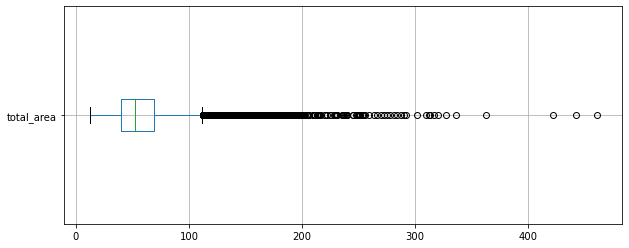

In [62]:
#посмотрим разброс значений площади объектов с помощью boxplot
data.boxplot(column=['total_area'], figsize=(10,4), vert=False);

<AxesSubplot:ylabel='Frequency'>

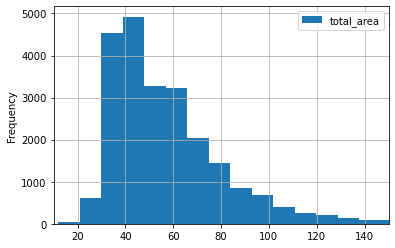

In [63]:
data.plot(y='total_area', kind='hist', xlim=(10, 150), bins=50, grid=True)

Мыслей на предмет выбросов в данном признаке не возникло. Оставим пока, как есть. В Питере и 12 метровые объекты недвижимости есть....Хотя в массовом сегменте реализуются объекты с площадью от 20 до  120 кв.м. Оставим для рассмотрения именно такую выборку. 

In [64]:
data = data.query('total_area > 20 and total_area < 121')

In [65]:
new_shape = data.shape
percent_del = round(((1 - new_shape[0] / old_shape[0]) *100), 1)

print(f'На текущий момент удалено {percent_del}% от исходного объема данных')

На текущий момент удалено 6.0% от исходного объема данных


In [66]:
#Проверим, что осталось:
data.describe().T    

,count,mean,std,min,25%,50%,75%,max
total_images,22283.0,9.812907,5.617825,0.0,6.000,9.0,14.00,50.0
last_price,22283.0,5380.909168,3219.699069,1010.0,3400.000,4550.0,6400.00,30000.0
total_area,22283.0,54.992711,20.041789,20.1,39.900,50.7,66.15,120.8
rooms,22283.0,1.965041,0.911627,0.0,1.000,2.0,3.00,7.0
ceiling_height,22283.0,2.702553,1.014381,1.0,2.600,2.6,2.70,100.0
floors_total,22283.0,10.866894,6.633091,1.0,5.000,9.0,16.00,60.0
living_area,22271.0,31.436704,13.852868,2.0,18.585,30.0,40.50,101.0
floor,22283.0,5.959745,4.925561,1.0,2.000,4.0,8.00,33.0
kitchen_area,22097.0,9.928050,4.301332,1.3,7.200,9.0,11.00,64.0
balcony,22283.0,0.599650,0.956825,0.0,0.000,0.0,1.00,5.0


Количество комнат `rooms` сократилось вместе с исключением из выборки объектов с большой площадью.

Надо разобраться с потолками, 100 м все еще никуда не делись!

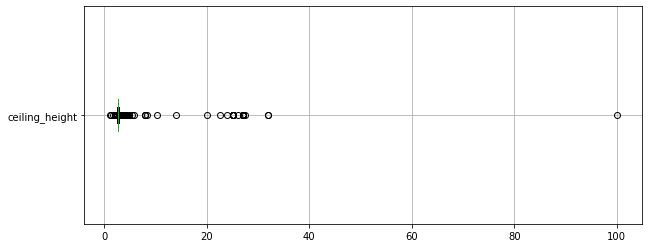

In [67]:
#посмотрим разброс высоты потолков объектов с помощью boxplot
data.boxplot(column=['ceiling_height'], figsize=(10,4), vert=False);

In [68]:
data.query('ceiling_height < 2')['last_price'].count()

3

Удалим из массива аномалии с полотками ниже 2 метров. 2,1 метра это уже могут быть мансардные объекты недвижимости.

In [69]:
data = data.query('ceiling_height > 2')

In [70]:
data.query('ceiling_height > 20')['last_price'].count()

22

Выдимо потолки высотою более 20 метров, возникли по причине человеческого фактора.

Для приведения их к нормальному значению, разделим эти артефакты на 10.

In [71]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[(data['ceiling_height'] > 20), 'ceiling_height'] / 10

In [72]:
data.query('ceiling_height > 5')['last_price'].count()

10

Таким образом после обработки, у нас остались еще потолки выше 5 метров, что является аномалией. Удалим данные объекты из выборки

In [73]:
data = data.query('ceiling_height < 5')

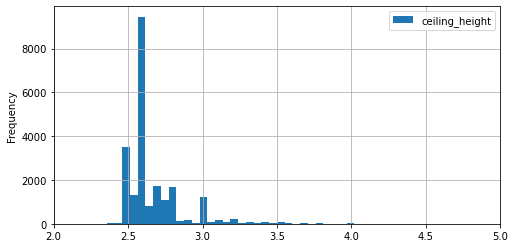

In [74]:
data.plot(y='ceiling_height', kind='hist', xlim=(2, 5), bins=50, grid=True, figsize=(8, 4));


Самое высокое здание Санкт-Петербурга ЖК "Александр Невский", в котором 37 этажей. Объекты имеющие этажность выше - будем считать выбросами - удалим их.

In [75]:
data = data.query('floors_total <= 37')

In [76]:
new_shape = data.shape
percent_del = round(((1 - new_shape[0] / old_shape[0]) *100), 1)

print(f'На текущий момент удалено {percent_del}% от исходного объема данных')

На текущий момент удалено 6.1% от исходного объема данных


In [77]:
#Проверим, что осталось:
data.describe().T   

,count,mean,std,min,25%,50%,75%,max
total_images,22257.0,9.814261,5.616624,0.0,6.0,9.0,14.0,50.0
last_price,22257.0,5381.864222,3219.613564,1010.0,3400.0,4550.0,6400.0,30000.0
total_area,22257.0,54.999849,20.044503,20.1,40.0,50.7,66.2,120.8
rooms,22257.0,1.965449,0.911634,0.0,1.0,2.0,3.0,7.0
ceiling_height,22257.0,2.673416,0.199739,2.2,2.6,2.6,2.7,4.8
floors_total,22257.0,10.863189,6.618223,1.0,5.0,9.0,16.0,36.0
living_area,22245.0,31.440941,13.850555,2.0,18.6,30.0,40.5,101.0
floor,22257.0,5.959294,4.925812,1.0,2.0,4.0,8.0,33.0
kitchen_area,22072.0,9.929218,4.303033,1.3,7.2,9.0,11.0,64.0
balcony,22257.0,0.599542,0.956215,0.0,0.0,0.0,1.0,5.0


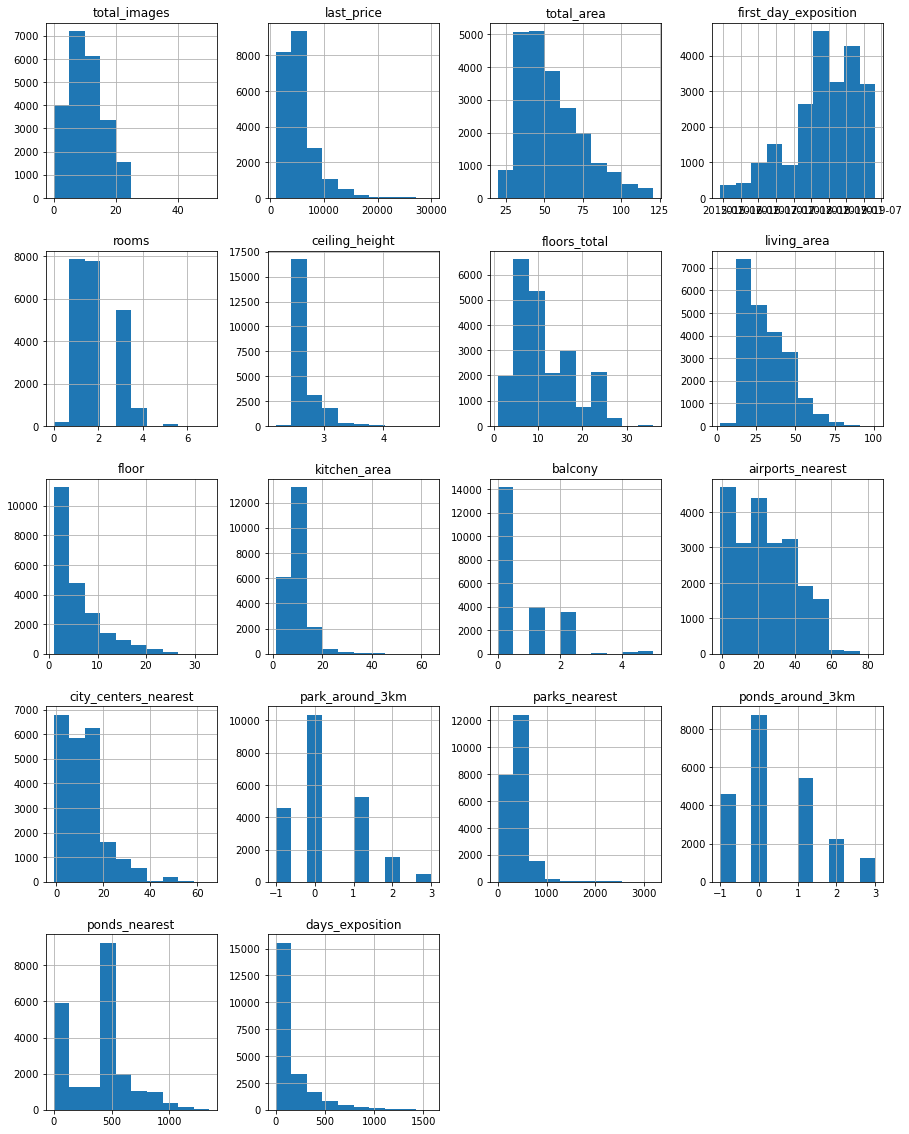

In [78]:
data.hist(figsize=(15, 20));

In [79]:
data.drop(['locality_name'], axis=1).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,park_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,area_category,locality_name_new
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,0,False,False,25.0,0,18,16,1,482,2,755,-1,I,санкт-петербург
1,7,3350,40.4,2018-12-04,1,2.60,11,18.6,1,0,False,False,11.0,2,12,18,0,-1,0,584,81,IV,поселок шушары
2,10,5196,56.0,2015-08-20,2,2.60,5,34.3,4,0,False,False,8.3,0,21,13,1,90,2,574,558,III,санкт-петербург
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,0,False,False,41.0,0,31,8,2,112,1,48,121,II,санкт-петербург
5,10,2890,30.4,2018-09-10,1,2.60,12,14.4,5,0,False,False,9.1,0,-1,-1,-1,-1,-1,-1,55,IV,поселок янино-1


**Выводы**

В результате предварительной обработке данных
 * найдены и изучены пропущенные значения
 * пропуски были заполнены на основании исследуемых данных, с применением статистических данных, а также логических умозаключений
 * обработаны выбросы и удалена из рассмотрения часть данных -6,1%.
 * дополительно проведена категоризация некоторых признаков
 * произведено преобразование типов данных

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем и добавим в таблицу столбец с ценой одного квадратного метра `m2_price`

In [80]:
data['m2_price'] = round((data['last_price'] / data['total_area']), 1)

На основании `first_day_exposition` создадим столбцы 
 * `week_day_exposition` - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
 * `month_exposition` - месяц публикации объявления
 * `year_exposition` - год публикации объявления

In [81]:
#Столбцы с характеристиками для размещения объявления
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

На основании данных `floors_total` и `floor` создадим категорийный признак тип этажа квартиры `floor_category`
(значения — «первый», «последний», «другой»)

In [82]:
def floor_categorize(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        return 'другой'
    except:
        return 'ошибка обработки'

In [83]:
data['floor_category'] = data.apply(floor_categorize, axis=1)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22257 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22257 non-null  int64         
 1   last_price            22257 non-null  int32         
 2   total_area            22257 non-null  float64       
 3   first_day_exposition  22257 non-null  datetime64[ns]
 4   rooms                 22257 non-null  int64         
 5   ceiling_height        22257 non-null  float64       
 6   floors_total          22257 non-null  int32         
 7   living_area           22245 non-null  float64       
 8   floor                 22257 non-null  int64         
 9   is_apartment          22257 non-null  object        
 10  studio                22257 non-null  bool          
 11  open_plan             22257 non-null  bool          
 12  kitchen_area          22072 non-null  float64       
 13  balcony         

**Вывод:**
 * добавлены новые признаки
 * в результате обработки и дополнения данных мы получили для изучения 22 259 объектов,
 * объем используемой памяти увеличился до 3.9МВ, в результате увеличения количества признаков до 29 (было 22)

### Проведите исследовательский анализ данных

Изучим характеристики объектов, которые у нас получились в результате подготовки данных для анализа.

#### общая площадь `total_area`

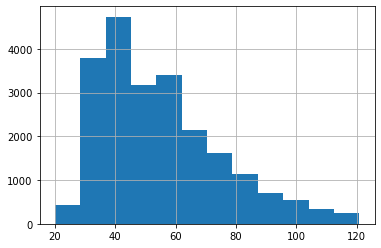

In [85]:
data['total_area'].hist(figsize=(6,4), bins=12);

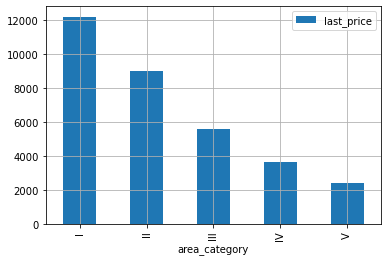

In [86]:
(data
 .pivot_table(index='area_category', values=['last_price'], aggfunc='median')
 .plot(kind='bar', grid=True, figsize=(6,4))
);

* Гистограмма распределения объектов по площади показывает, что наибольшее количество объектов имеют площадь 35-40 кв.м.
* Наиболее дорогими являются объекты I категории (с максимальной площадью в изучаемом диапазоне) и это вполне логично.
* Медианная цена мини-квартирок (до 25 кв.м.) составляет 2400 тыс.руб.

#### жилая площадь `living_area`

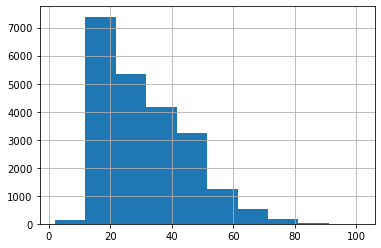

In [87]:
data['living_area'].hist(figsize=(6,4));

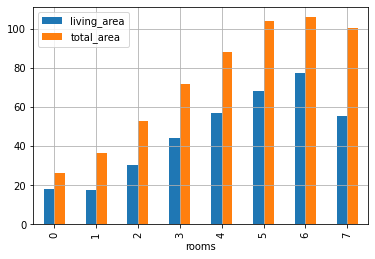

In [88]:
(data
 .pivot_table(index='rooms', values=['total_area', 'living_area'], aggfunc='median')
 .plot(kind='bar', grid=True, figsize=(6,4))
);

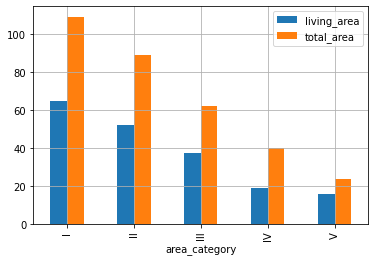

In [89]:
( data
 .pivot_table(index='area_category', values=['total_area', 'living_area'], aggfunc='median')
 .plot(kind='bar', grid=True, figsize=(6,4))
);

* наибольшее количество объектов недвижимости, имеют жилую площадь до 30 кв.м. и это вполне объяснимо, так как по статистике наибольшей популярностью пользуются однокомнатные квартиры и студии, жилая площадь в которых, как раз находится в данном диапазоне
* с увеличением комнатности растет и жилая и общая площадь объектов
* самые большие площади у объектов I категории.

#### площадь кухни `kitchen_area`

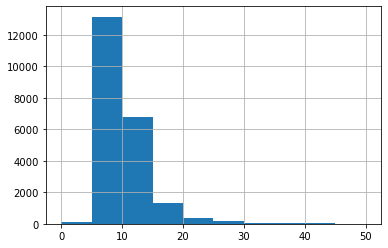

In [90]:
data['kitchen_area'].hist(figsize=(6,4), range=(0,50));

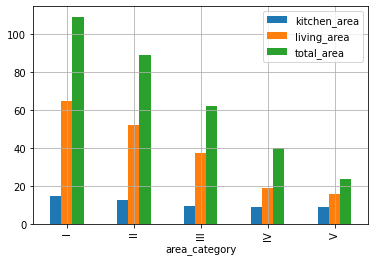

In [91]:
(data
 .pivot_table(index='area_category', values=['total_area', 'living_area', 'kitchen_area'], aggfunc='median')
 .plot(kind='bar', grid=True, figsize=(6,4))
);

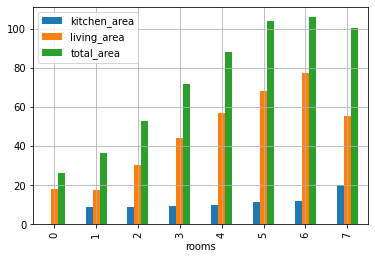

In [92]:
(data
 .pivot_table(index='rooms', values=['total_area', 'living_area', 'kitchen_area'], aggfunc='median')
 .plot(kind='bar', grid=True, figsize=(6,4))
);

* не опять, а снова...наибольшее количество объектов недвижимости, имеют площадь кухни до 10 кв.м.
* с увеличением комнатности площадь кухни растет не так стремительно, как жилая или общая
* самые большие кухни у больших объектов.

#### цена объекта  `last_price`

А теперь самый главный параметр - цена продажи `last_price`

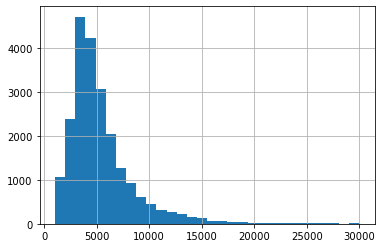

In [93]:
data['last_price'].hist(figsize=(6,4), bins=30);

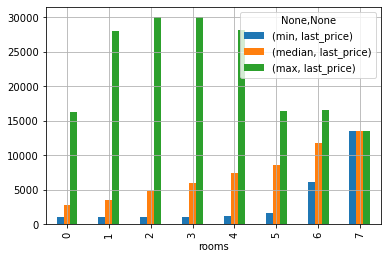

In [94]:
(data
 .pivot_table(index='rooms', values=['last_price'], aggfunc=['min', 'median', 'max'])
 .plot(kind='bar', grid=True, figsize=(6,4))
);

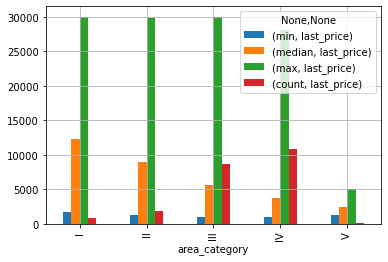

In [95]:
(data
 .pivot_table(index='area_category', values=['last_price'], aggfunc=['min', 'median', 'max', 'count'])
 .plot(kind='bar', grid=True, figsize=(6,4))
);

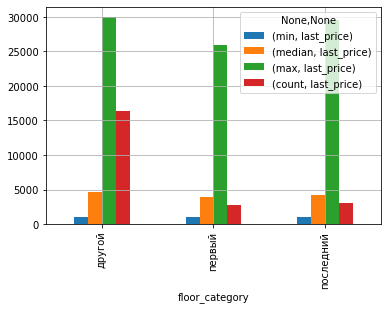

In [96]:
(data
 .pivot_table(index='floor_category', values=['last_price'], aggfunc=['min', 'median', 'max', 'count'])
 .plot(kind='bar', grid=True, figsize=(6,4))
);

In [97]:
data['last_price'].describe()

count    22257.000000
mean      5381.864222
std       3219.613564
min       1010.000000
25%       3400.000000
50%       4550.000000
75%       6400.000000
max      30000.000000
Name: last_price, dtype: float64

 * половина всех объектов были проданы дешевле 4,5 млн.руб.
 * наибольшая часть объектов находится в ценовом диапазоне 3,5 до 6,5 млн.руб.
 * минимальные цены практически не зависят от количества комнат и этажности
 * медианная и максимальные цены выше у объектов находящихся на этажах выше первого
 * медианная цена снижается при снижении категории объекта, чего нельзя сказать о максимальной цене

#### количество комнат `rooms`

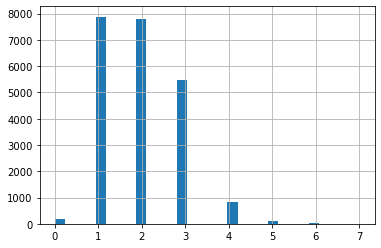

In [98]:
data['rooms'].hist(figsize=(6,4), bins=30);

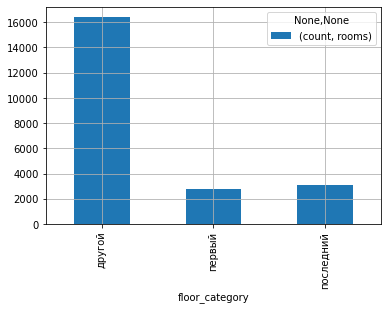

In [99]:
(data
 .pivot_table(index='floor_category', values=['rooms'], aggfunc=['count'])
 .plot(kind='bar', grid=True, figsize=(6,4))
);

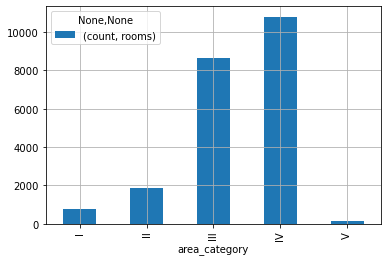

In [100]:
(data
 .pivot_table(index='area_category', values=['rooms'], aggfunc=['count'])
 .plot(kind='bar', grid=True, figsize=(6,4))
);

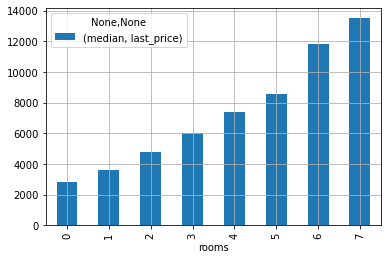

In [101]:
(data
 .pivot_table(index='rooms', values=['last_price'], aggfunc=['median'])
 .plot(kind='bar', grid=True, figsize=(6,4))
);

* более половины всех объектов являются одно и двухкомнатными
* медианная цена растет с увеличением количества комнат
* основная масса недвижимости относится к III и IV категориям (площадь от 25 до 80 кв.м.)

#### высота потолков `ceiling_height`

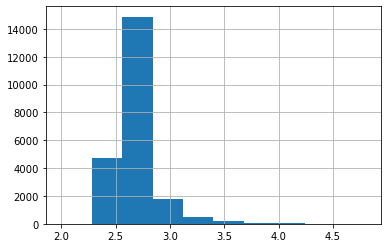

In [102]:
data['ceiling_height'].hist(bins=10, range=(2, 4.8), figsize=(6,4));

In [103]:
data['ceiling_height'].describe()

count    22257.000000
mean         2.673416
std          0.199739
min          2.200000
25%          2.600000
50%          2.600000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

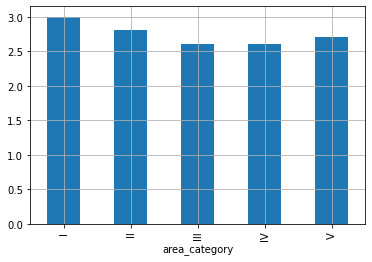

In [104]:
(data
 .pivot_table(index='area_category', values=['ceiling_height'], aggfunc=['median'])
 .plot(kind='bar', grid=True, figsize=(6,4), legend=False)
);

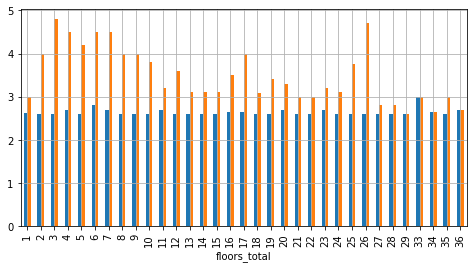

In [105]:
(data
 .pivot_table(index='floors_total', values=['ceiling_height'], aggfunc=['median', 'max'])
 .plot(kind='bar', grid=True, figsize=(8,4), legend=False)
);

* медиана высоты полотков составляет 2.6 метра
* самые высокие потолки в объектах I категории
* медианная высота потолка не сильно зависит от этажности дома
* максимальная высота потолков в 3х этажных и 26ти этажных зданиях.

#### этаж квартиры `floor`

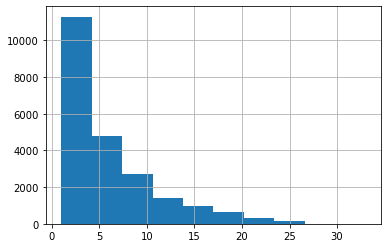

In [106]:
data['floor'].hist(figsize=(6,4));

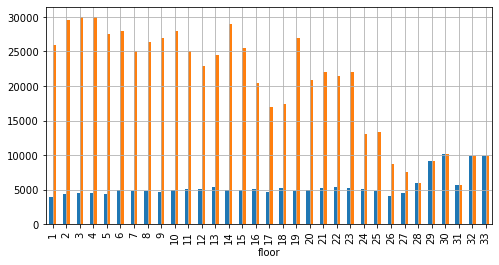

In [107]:
(data
 .pivot_table(index='floor', values=['last_price'], aggfunc=['median', 'max'])
 .plot(kind='bar', grid=True, figsize=(8,4), legend=False)
);

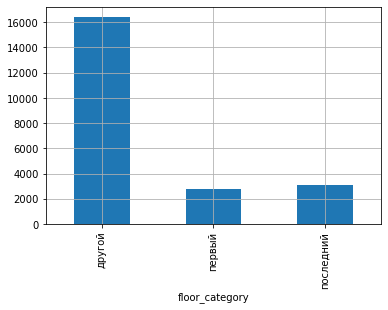

In [108]:
(data
 .pivot_table(index='floor_category', values=['floor'], aggfunc=['count'])
 .plot(kind='bar', grid=True, figsize=(6,4), legend=False)
);

In [109]:
data.floor.describe()

count    22257.000000
mean         5.959294
std          4.925812
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

* наибольшее количество объектов находится на этажах ниже 5, и это логично, так как в Питере много исторических зданий, невысокой этажности.
* представлено больше объектов, расположеннных на последних этажах, нежели на первых. Видимо это объяснятеся коммерческими помещениями на первых этажах.
* если рассматривать цену , то максимальная стоимость квартир, расположенных на 3, 4 этажах и достигает 30 млн.руб.

#### тип этажа квартиры `floor_category`

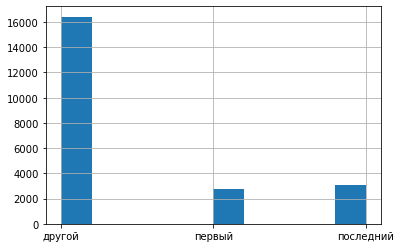

In [110]:
data['floor_category'].hist(figsize=(6,4));

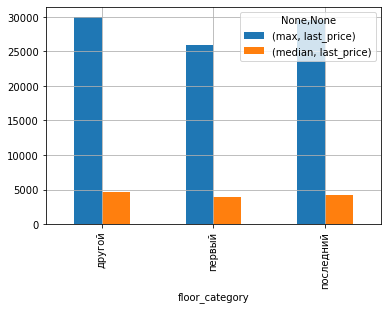

In [111]:
(data
 .pivot_table(index='floor_category', values=['last_price'], aggfunc=['max', 'median'])
 .plot(kind='bar', grid=True, figsize=(6,4))
);

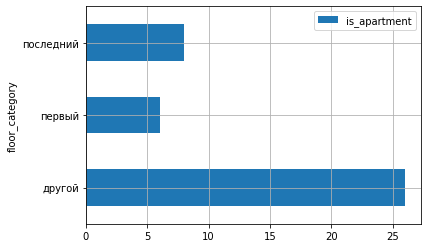

In [112]:
(data
 .pivot_table(index='floor_category', values=['is_apartment'], aggfunc='sum')
 .plot(kind='barh', grid=True, figsize=(6,4))
);

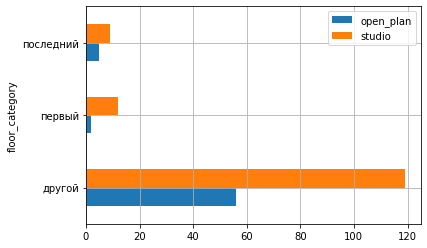

In [113]:
(data
 .pivot_table(index='floor_category', values=['studio', 'open_plan'], aggfunc='sum')
 .plot(kind='barh', grid=True, figsize=(6,4))
);

In [114]:
data .pivot_table(index='floor_category', values=['last_price'], aggfunc=['max', 'median'])

,max,median
,last_price,last_price
floor_category,,
другой,30000,4700
первый,26000,3900
последний,29500,4200


* естественно, что основная масса объектов размещена не на крайних этажах
* медиана цены выше у объектов не на крайних этажах
* медианная цена объектов на первом и последних этажах отличается не сильно, чего нельзя сказать о максимальной стоимости

Рассмотрели размещение студий, квартир с открытой планировкой и апартаментов:
* из данных следует, что студии чаще располагаются на первом, чем на последнем этаже
* апартаменты и открытые планировки чаще встречаются на последних этажах

#### общее количество этажей в доме `floors_total`

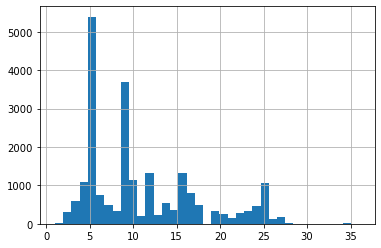

In [115]:
data['floors_total'].hist(figsize=(6,4), bins=37);

In [116]:
data['floors_total'].describe()

count    22257.000000
mean        10.863189
std          6.618223
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

In [117]:
data.groupby('floors_total')['total_area'].count().sort_values(ascending=False).head(10)

floors_total
5     5389
9     3700
12    1321
16    1314
10    1143
4     1077
25    1060
17     809
6      740
3      596
Name: total_area, dtype: int64

 Описательная статистика нам в данном случает мало о чем говорит, а вот гистограмма раскажет о многом:
 * максимальное количество объектов представлено в 5ти этажных домах
 * далее по популярности идут 9, 12, 16 этажные здания. Что говорит о массовых типовых застройках

#### расстояние до центра города `city_centers_nearest`

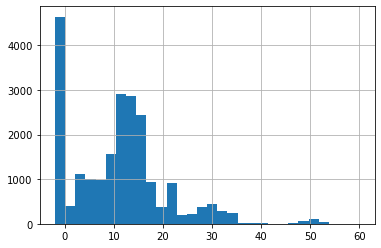

In [118]:
data['city_centers_nearest'].hist(figsize=(6,4), bins=30, range=(-2, 60));

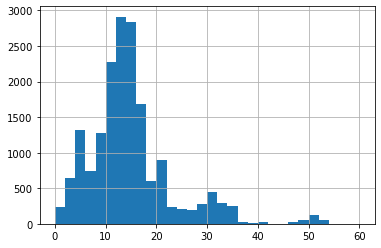

In [119]:
data['city_centers_nearest'].hist(figsize=(6,4), bins=30, range=(0, 60));

In [120]:
data.query('city_centers_nearest >= 0')['city_centers_nearest'].describe()

count    17673.000000
mean        14.353873
std          8.491211
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         65.000000
Name: city_centers_nearest, dtype: float64

* на гистограмме видно, что почти 5 тыс. объевто не имеют картографических данных
* максимальное число объектов недвижимости в диапазоне 10-20 км от центра города.
* 75% выборки расположены на расстоянии не более 16 км от центра города
* достаточно много расположено в центре, с пиком 5 км от центра города
* есть пиковые значения в 20 км, 30 км и 50 км от центра, что скорее всего связано с массовой районной застройкой 

#### расстояние до ближайшего аэропорта `airports_nearest`

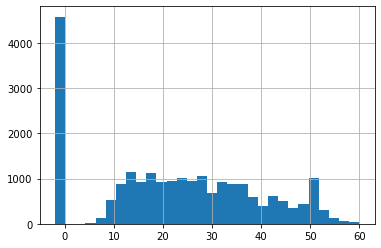

In [121]:
data['airports_nearest'].hist(figsize=(6,4), bins=30, range=(-2, 60));

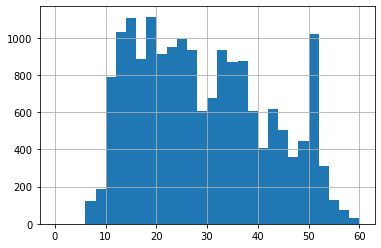

In [122]:
data['airports_nearest'].hist(figsize=(6,4), bins=30, range=(0, 60));

In [123]:
data.query('airports_nearest >= 0')['airports_nearest'].describe()

count    17673.000000
mean        29.104170
std         13.259206
min          0.000000
25%         18.000000
50%         27.000000
75%         39.000000
max         84.000000
Name: airports_nearest, dtype: float64

* на гистограмме видно, что почти 5 тыс. объектов не имеют картографического признака об удаленности от аэропорта
* в среднем удаленность от аэропорта составляет чуть менее 30 км.
* 3/4 объектов удалены от аэропорта не более чем на 40 км
* на расстоянии 50 км от аэропорта имеется пиковое значение по количеству объектов, возможно имеется какой-то достаточно крупный микрорайон на этом расстоянии от аэропорта

#### расстояние до ближайшего парка `parks_nearest`

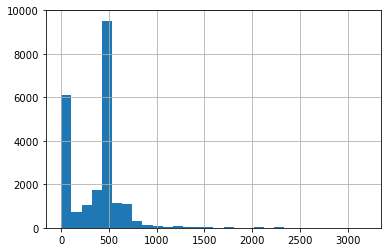

In [124]:
data['parks_nearest'].hist(figsize=(6,4), bins=30);

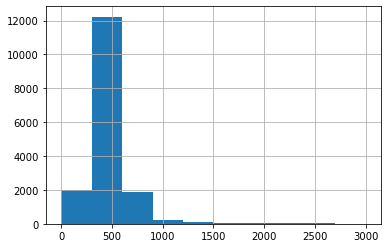

In [125]:
data['parks_nearest'].hist(figsize=(6,4), range=(0, 3000));

In [126]:
data.query('parks_nearest >= 0')['parks_nearest'].describe()

count    16547.000000
mean       477.966217
std        234.105280
min          1.000000
25%        433.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [127]:
data.query('parks_nearest > 1 and parks_nearest < 500')['parks_nearest'].count()

13078

* почти 6 тыс. незаполненных значений у признака
* немногим более 13 тыс.объектов имеют рядом парк на расстоянии не более 0,5 км.
* около 4 тыс.объектов с имеют парк на расстоянии не более 3 км.

#### день и месяц публикации объявления

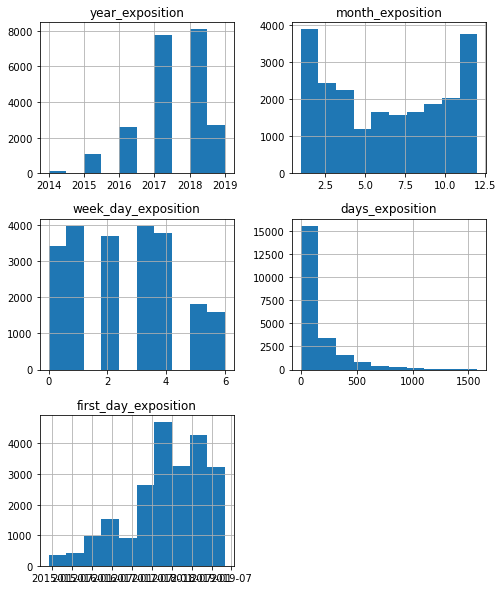

In [128]:
#создадим датафрейм с даммыми по дате размещения объявления и длительностью его нахождения
data_date = data[['year_exposition', 'month_exposition', 'week_day_exposition', 'days_exposition', 'first_day_exposition']]
data_date.hist(figsize=(8,10));

 Если рассматривать размещение объявлений в **рассматриваемом периоде**, то можно сделать следующие выводы:
 * Наибольшее количество объявлений о продаже недвижимости было размещено на площадке в 2018 году.
 * Прослеживается явная тенденция увеличения количества объявлений от года к году.
 * Снижение в 2019 году обусловлено тем, что исследуемые данные содержат информацию до 03 мая 2019 

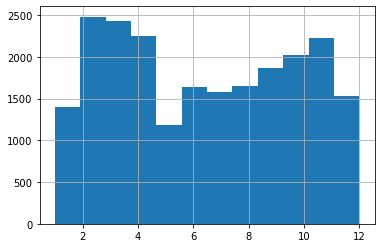

In [129]:
data_date.month_exposition.hist(bins=12, figsize=(6,4));

 Если рассматривать размещение объявлений в разрезе **года**, то можно сделать следующие выводы:
 * активнее всего размещение объявлений происходит в зимние месяцы после новогодних праздников, 
 * далее прослеживается снижение активности к майским праздникам
 * в июне наблюдается восстановление активности с последующим ростом к новому пику - в ноябре месяце.


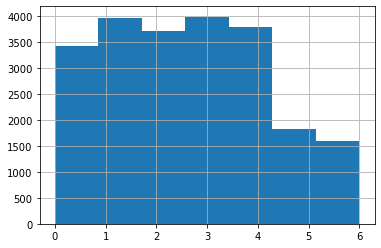

In [130]:
data_date.week_day_exposition.hist(bins=7, figsize=(6,4));

Выходные))) они и в Африке выходные. Даже объявления никто не хочет размещать.
 * наибольшее количество объявление о продаже размещается по четвергам
 * в выходные размещается в 2,5 раза меньше объевлений
 

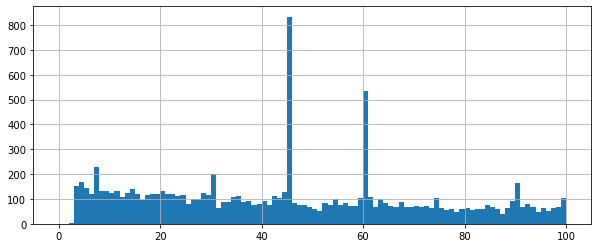

In [131]:
data_date.days_exposition.hist(range=(0, 100), figsize=(10,4), bins=100);

In [132]:
#Проверим на какое количество дней приходятся пиковые значения
data_date.query('days_exposition < 100 and days_exposition > 0').groupby('days_exposition')['year_exposition'].count().sort_values(ascending=False).head(5)

days_exposition
45    834
60    535
7     227
30    201
4     169
Name: year_exposition, dtype: int64

In [133]:
data_date['days_exposition'].describe()

count    22257.000000
mean       153.322146
std        208.659276
min         -1.000000
25%         23.000000
50%         72.000000
75%        194.000000
max       1580.000000
Name: days_exposition, dtype: float64

`days_exposition` описывает сколько дней было размещено объявление (от публикации до снятия):
  * соответствует распределению Пуассона
  * медианное значение соотвествует 93 дням, что говорит о том, что половина объектов реализуется за 3 месяца.
  * соответственно быстрыми продажами можно считать продажи за 1,5 месяца, а долгими - свыше 7,5 месяцев.
  * пик продаж приходится на 45 и 60 дней, по всей видимостью это связано с автоматическим снятием объявления в зависимости от сроков подписки 

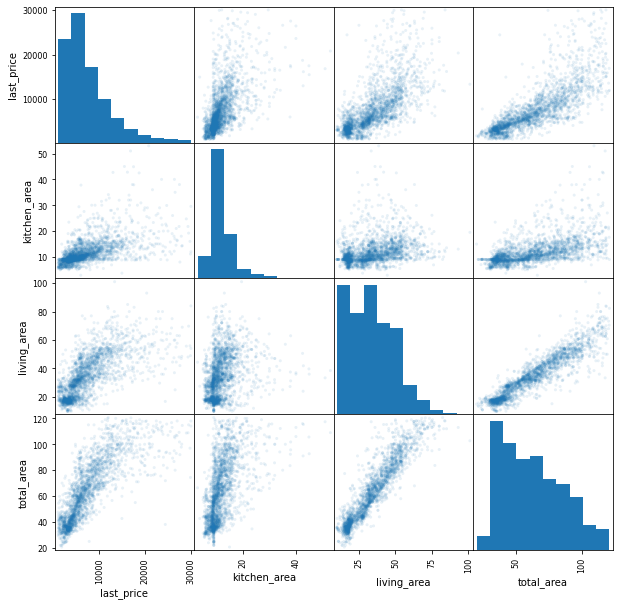

In [134]:
# построим диаграммы рассеяния для зависимостей медианной цены и площадей
(
    pd.plotting.scatter_matrix(
    data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area'], 
                              aggfunc='median').reset_index()
    , figsize=(10, 10), alpha=0.1)
);

In [135]:
# построим матрицу корреляции Пирсона для медианной цены и площадей
(
    data
    .pivot_table(index='last_price', values=['total_area','living_area', 'kitchen_area'],
                     aggfunc='median')
    .reset_index()
    .corr()
)

,last_price,kitchen_area,living_area,total_area
last_price,1.000000,0.568009,0.694409,0.797180
kitchen_area,0.568009,1.000000,0.321203,0.552884
living_area,0.694409,0.321203,1.000000,0.925400
total_area,0.797180,0.552884,0.925400,1.000000


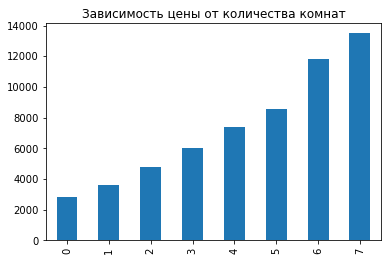

In [136]:
# рассмотрим зависимости цен от количества комнат
(
    data
    .pivot_table(index='rooms', values=['last_price'],
                     aggfunc=['median'])
    .reset_index(drop=True)
    .plot(kind='bar', title='Зависимость цены от количества комнат', legend=False, figsize=(6,4))
);

In [137]:
# рассмотрим зависимости цен от количества комнат
data.pivot_table(index='rooms', values=['last_price'], aggfunc=['min', 'median', 'max']).reset_index().corr()

,,rooms,min,median,max
,,,last_price,last_price,last_price
rooms,,1.000000,0.746147,0.981210,-0.481693
min,last_price,0.746147,1.000000,0.841497,-0.636344
median,last_price,0.981210,0.841497,1.000000,-0.572323
max,last_price,-0.481693,-0.636344,-0.572323,1.000000


* в среднем с увеличением количества комнат, растет и цена на объект недвижимости
* а вот для максимальной цены связь с количеством комнат, совсем не однозначна.

Зависимость цены от этажа мы уже рассмотрели ранее. Проверим зависимость цены от даты размещения объеявления

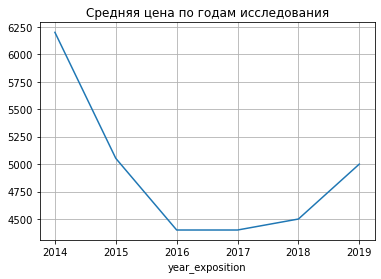

In [159]:
(
    data
    .pivot_table(index='year_exposition', values=['last_price'],
                     aggfunc='median')
    .plot(figsize=(6,4), grid=True, title='Средняя цена по годам исследования', legend=False)
);

In [139]:
data.pivot_table(index='year_exposition', values=['last_price'], aggfunc='median').reset_index().corr()

,year_exposition,last_price
year_exposition,1.000000,-0.593343
last_price,-0.593343,1.000000


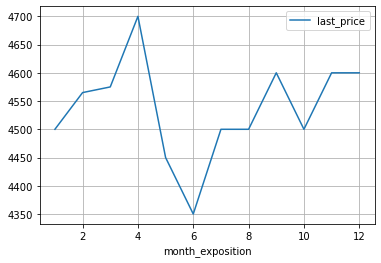

In [140]:
(
    data
    .pivot_table(index='month_exposition', values=['last_price'],
                     aggfunc='median')
    .plot(figsize=(6,4), grid=True)
);

In [141]:
data.pivot_table(index='month_exposition', values=['last_price'], aggfunc='median').reset_index().corr()

,month_exposition,last_price
month_exposition,1.000000,0.096861
last_price,0.096861,1.000000


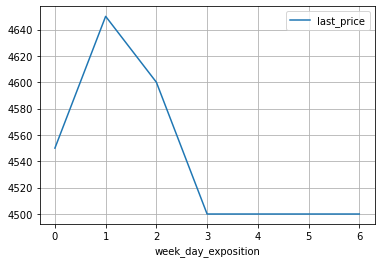

In [142]:
(
    data
    .pivot_table(index='week_day_exposition', values=['last_price'],
                     aggfunc='median')
    .plot(figsize=(6,4), grid=True)
);

In [143]:
data.pivot_table(index='week_day_exposition', values=['last_price'], aggfunc='median').reset_index().corr()

,week_day_exposition,last_price
week_day_exposition,1.000000,-0.698501
last_price,-0.698501,1.000000


По результатам построения диаграмм рассения и матрицы корреляции Пирсона можно сделать следующие выводы:
* наблюдается сильная зависимость медианной (а также минимальной) цены от общей площади объекта, меньшая зависимость от жилой площади и самая низкая зависимость от площади кухни
* если рассматривать максимальные цены на объекты, то зависимость от общей площади по сравнению с медианными значениями снижается
* цена растет с увеличением количества комнат
* наблюдается очень сильный разброс цен в объектах с меньшим количеством комнат
* наблюдается линейная зависимость медианной стоимости объекта и количества комнат
* корреляция между максиамльной стоимостью и количеством комнат отсуствует.
* медианная и максимальные цены выше у объектов находящихся на этажах выше первого.
* цена не зависит от дня недели, месяца и года размещения объявления.

**Выясним среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [144]:
m2_price = data.pivot_table(index='locality_name_new', values='m2_price', aggfunc=['count', 'mean', 'median'])
m2_price.columns = ['count', 'mean', 'median']
m2_price.reset_index(inplace=True)
m2_price['mean'] = m2_price['mean'].round(2)
m2_price = m2_price.sort_values('count', ascending=False).head(10).reset_index(drop=True)
m2_price

,locality_name_new,count,mean,median
0,санкт-петербург,14667,110.12,103.90
1,поселок мурино,555,85.68,85.70
2,поселок шушары,438,78.64,76.75
3,всеволожск,392,68.83,65.80
4,пушкин,349,102.27,99.70
5,колпино,336,75.37,74.70
6,поселок парголово,326,90.33,91.75
7,гатчина,303,69.11,67.90
8,деревня кудрово,298,92.48,91.95
9,выборг,226,58.89,58.55


In [145]:
m2_price[['locality_name_new', 'count' ,'mean', 'median']].rename(columns={
    'locality_name_new': 'населенный пункт', 'count' : 'кол-во объектов','mean' : 'средняя стоимость кв.м.',
    'median' : 'медиана стоимости кв.м.'})

,населенный пункт,кол-во объектов,средняя стоимость кв.м.,медиана стоимости кв.м.
0,санкт-петербург,14667,110.12,103.90
1,поселок мурино,555,85.68,85.70
2,поселок шушары,438,78.64,76.75
3,всеволожск,392,68.83,65.80
4,пушкин,349,102.27,99.70
5,колпино,336,75.37,74.70
6,поселок парголово,326,90.33,91.75
7,гатчина,303,69.11,67.90
8,деревня кудрово,298,92.48,91.95
9,выборг,226,58.89,58.55


* самый дорогой квадратный метр недвижимости, как и следовало предположить, в Санкт-Петербуре. На втором месте - Пушкин, на то он и Царское село
* замыкает 10 лидеров продаж Выборг, кв.м. в котором в среднем обойдется дешевле 60 тыс.руб.


 выполнено задание: 
 
 "Ранее вы посчитали расстояние до центра в километрах. 
 
 Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [146]:
km_price = data[data['locality_name_new'] == 'санкт-петербург'].pivot_table(index='city_centers_nearest', values=['m2_price', 'last_price'],
                                                                aggfunc='mean')
km_price.columns=['price', 'm2_price']
km_price['price'] = km_price['price'].round(2)
km_price['m2_price'] = km_price['m2_price'].round(2)
km_price.reset_index(inplace=True)

In [147]:
km_price[['city_centers_nearest', 'price', 'm2_price']].rename(columns={
    'city_centers_nearest': 'удаленность от центра, км', 'price' : 'средняя цена объекта, тыс.руб.','m2_price' : 'средняя стоимость кв.м., тыс.руб.'})

,"удаленность от центра, км","средняя цена объекта, тыс.руб.","средняя стоимость кв.м., тыс.руб."
0,0,10295.33,133.23
1,1,10337.21,142.21
2,2,9182.15,124.89
3,3,8654.11,120.87
4,4,9676.95,133.28
5,5,9169.63,132.50
6,6,8379.35,130.65
7,7,8166.70,127.84
8,8,7209.91,117.38
9,9,5961.32,109.50


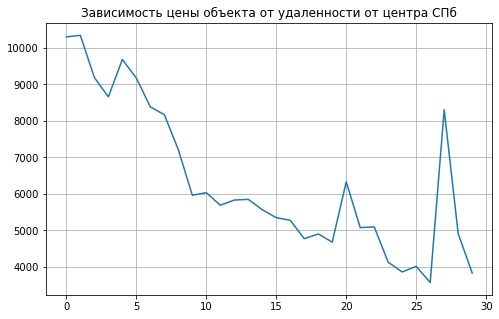

In [153]:
km_price['price'].plot(figsize=(8,5), grid=True, title='Зависимость цены объекта от удаленности от центра СПб');

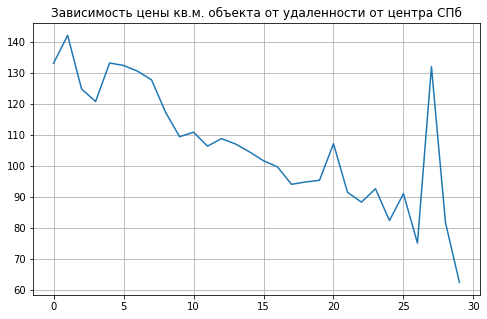

In [154]:
km_price['m2_price'].plot(figsize=(8,5), grid=True, title = 'Зависимость цены кв.м. объекта от удаленности от центра СПб');

In [150]:
km_price.corr()

,city_centers_nearest,price,m2_price
city_centers_nearest,1.000000,-0.817295,-0.822542
price,-0.817295,1.000000,0.938215
m2_price,-0.822542,0.938215,1.000000


* естественно, самые дорогие объекты в самом сердце города
* стоимость объектов и квадратного метра снижается с удалением от центра
* коэффициент корреляции говорит о том, что существует почти линейна связь между расстоянием от центра и стоимостью объектов недвижимости

### Общий вывод

В ходе проекта были исследованы данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Была выполнены следующие этапы:
* Предобработка дынных
* Добавление новых данных
* Исследовательский анализ данных


В процессе преобработки данных мы выяснили, для изучения представлены данные по объектам недвижимости, описываемые 22 признаками и содержащие 23 699 записей.
   Первичный анализ данных показал, что 
   *  в данных имеются пропуски:
            - так к примеру признак ceiling_height имеет 39% пропусков;
            - картографические признаки имеют от 23% до 65% пропусков;
   *  название одного из столбцов содержит верхний регистр.

   Распределение числовых признаков показывает, что имеются выбросы, аномальные значения:
   *  так как разброс высоты потолка составляет от 1 до 100 м
   *  максимальная цена объекта 76 300 000 руб. при медианном значении 4 650 000 руб.
   *  максимальная площадь составляет 900 м²
   *  количество комнат от 0 до 19 шт
   
 Таким образом, первичный анализ готовит о достаточно сырых данных. 
 
 Наличие значительного объема пропущенных данных в картографических признаках свидетельствует о технических проблемах при получении таких данных системой.
 

**В результате предобработки данных**

*  были заполнены пропущенные значение, на основании имеющихся данных;
*  созданы дополнительные признаки, для категоризации объектов и как вспомогательный инструмент для анализа и заполнения пропусков в данных;
*  удалены неявные дубликаты в названиях населенных пунктов;
*  произведена обработка и преобразвание признаков в другим типам, для снижения объема используемых ресурсов и удобства работы с данными.

Отсутсвующие картографические пропуски были заполнены на основании имеющихся в распоряжении данных по населенным пунктам. 
В процессе обработки около 5-6 тыс. значение заполнить адекватными данными не преставилось возможности, так как по ряду населенных пунктов такие признаки отсуствовали вовсе. Для дальнейшей работы с этими признаками, оставшиеся пропуски заполнены значением "-1".

Анализ признаков на наличие выбросов выявил следующие ключевые аномалии:

 - `last_price` имеет значительный разброс цен, из рассмотрения были изключениы объекты дороже 30 000 тыс.руб., которые можно отнести к эксклюзивной категории, 
и объекты дешевле 1 000 тыс.руб.
 - `rooms` также содержал нестандартные объекты - 19 комнатные квартиры или дворцы, не каждый раз встречаются.   
 - `ceiling_height` исправлены ошибочные значения, аномальные с высотой потолка до 2 метров и свыше 5 - исключили из выборки. Так как в Спб максимальная высота потолков составляет 4,7 м.
 - `floors_total` избавили от выбросов, так как 60ти этажных зданий на момент формирования данных в Спб не было, а самым высоким считался ЖК "Александр Невский" высотой в 37 этажей.
 - `living_area` от 0 и од 900 кв.м....ну оччень пространный признак, ограничились адекватными данными в 120 кв.м.
 

С результате предобработки мы исключили из выборки 6%  данных от исходного размера.

На следующем этапе:
- рассчитали и добавили стоимость 1 кв.м.
- дополнили данными о дне недели/месяце/годе разещения объевления
- создали категорийный признак "тип этажа"

**По результатам анализа данных выяснили**

1. Наибольшее количество объектов на рынке недвижимости имеют следующие характеристики:
  - общая площадь 35-40 кв.м.;
  - жилую площадь до 30 кв.м.;
  - наибольшей популярностью пользуются однокомнатные квартиры и студии;
  - более половины всех объектов являются одно и двухкомнатными;
  - имеют площадь кухни до 10 кв.м.;
  - половина всех объектов были проданы дешевле 4,5 млн.руб.;
  - наибольшая часть объектов находится в ценовом диапазоне 3,5 до 6,5 млн.руб.;
  - медиана высоты потолков составляет 2.6 метра;
  - естественно, что основная масса объектов размещена не на крайних этажах;
  - находятся на этажах ниже 5, и это логично, так как в Питере много исторических зданий, невысокой этажности.
  - максимальное количество объектов представлено в 5ти этажных домах. Далее по популярности идут 9, 12, 16 этажные здания. Что говорит о массовых типовых застройках;
  - 75% выборки расположены на расстоянии не более 16 км от центра города;
  - максимальное число объектов недвижимости в диапазоне 10-20 км от центра города;
  - половина объектов реализуется за 3 месяца, соответственно быстрыми продажами можно считать продажи за 1,5 месяца, а долгими - свыше 7,5 месяцев.
  - в среднем удаленность от аэропорта составляет чуть менее 30 км. - примерно на таком расстоянии и находится аэропорт от центра города;
  - немногим более 13 тыс.объектов имеют рядом парк на расстоянии не более 0,5 км.;
  - наибольшее количество объявление о продаже размещается по четвергам.
  
  
2. Интересные факты:
 - в среднем цена мини-квартирок (до 25 кв.м.) составляла 2400 тыс.руб.
 - с увеличением комнатности площадь кухни растет не так стремительно, как жилая или общая площадь;
 - минимальные цены практически не зависят от количества комнат и этажности
 - максимальная высота потолков в 3х этажных и 26ти этажных зданиях;
 - если рассматривать цену , то максимальная стоимость квартир, расположенных на 3, 4 этажах и достигает 30 млн.руб.;
 - есть пиковые значения количества объектов в 20 км, 30 км и 50 км от центра, что скорее всего связано с массовой районной застройкой;
 - на расстоянии 50 км от аэропорта имеется пиковое значение по количеству объектов, возможно имеется какой-то достаточно крупный микрорайон на этом расстоянии от аэропорта
 - наибольшее количество объявлений о продаже недвижимости было размещено на площадке в 2018 году, прослеживается явная тенденция увеличения количества объявлений от года к году;
 -  активнее всего размещение объявлений происходит в зимние месяцы после новогодних праздников;
 - выходные))) они и в Африке выходные. Даже объявления никто не хочет размещать.

3. Выявлены следующие зависимости:

- наблюдается сильная зависимость медианной (а также минимальной) цены от общей площади объекта, меньшая зависимость от жилой площади и самая низкая зависимость от площади кухни;
- если рассматривать максимальные цены на объекты, то зависимость от общей площади по сравнению с медианными значениями снижается;
- средняя цена растет с увеличением количества комнат;
- наблюдается очень сильный разброс цен в объектах с меньшим количеством комнат;
- медианная и максимальные цены выше у объектов находящихся на этажах выше первого;
- цена не зависит от дня недели, месяца и года размещения объявления.
- самый дорогой квадратный метр недвижимости, как и следовало предположить, в Санкт-Петербуре. На втором месте - Пушкин, на то он и Царское село;
- замыкает 10 лидеров продаж Выборг, кв.м. в котором в среднем обойдется дешевле 60 тыс.руб.;
- естественно, самые дорогие объекты в самом сердце города;
- стоимость объектов и квадратного метра снижается с удалением от центра;
- коэффициент корреляции говорит о том, что существует почти линейна связь между расстоянием от центра и стоимостью объектов недвижимости

Таким образом, изучение данных подтвердило следующие практически общеизвестные факты:
- чем больше квартира - тем она дороже
- чем ближе к центру - тем дороже
- наиболее популярный сегмент маленькие квартиры до 40 кв.м